In [1]:
# hist comparison
from matplotlib.pyplot import *
import numpy as np
import pandas as pd
import os
import importlib


from ATARI.sammy_interface import sammy_interface, sammy_classes, sammy_functions, template_creator

from ATARI.ModelData.particle_pair import Particle_Pair

from ATARI.ModelData.experimental_model import Experimental_Model

from copy import copy

from ATARI.AutoFit import chi2_eliminator_v2
from ATARI.AutoFit import elim_addit_funcs

# for animation
from PIL import Image
import imageio
import glob


In [2]:
%matplotlib widget

In [3]:
settings = {
    'path_to_SAMMY_exe': '/home/fire/SAMMY/sammy/build/install/bin/sammy',
    'path_to_SAMMY_temps': './sammy_temps/',
    'keep_runDIR_SAMMY': True,
    'shell_SAMMY': 'bash',
}

savefolder = './data/'
savefolder = './data_new/'

# creating and saving images
anim_save_dir = savefolder+'anim/'

# Ensure the folder exists
if not os.path.exists(anim_save_dir ):
    os.makedirs(anim_save_dir)

all_histories_data = {
    '0': {'dataset_pkl': 'dataset_sf_33_er[202_227]_chi2allowed_0.pkl',
           'hist_pkl': 'hist_sf_33_er[202_227]_chi2allowed_0.pkl',
           },

    '0_asg_sf_35': {
        'dataset_pkl': 'dataset_sf_35_er[202_227]_chi2allowed_0_allspingr.pkl',
        'hist_pkl': 'hist_sf_35_er[202_227]_chi2allowed_0_allspingr.pkl'
    },

    '0_asg_sf_50':{
        'dataset_pkl': 'dataset_sf_50_er[202_227]_chi2allowed_0_allspingr.pkl',
        'hist_pkl': 'hist_sf_50_er[202_227]_chi2allowed_0_allspingr.pkl'
    },
    
    # start from 35, 15 - start deef fitting from, greedy mode
    '0_asg_sf_35_greedy_sdf_15':{
        'dataset_pkl': 'dataset_sf_35_greedy_True_er[202_227]_chi2allowed_0_allspingr_sdf_15.pkl',
        'hist_pkl': 'hist_sf_35_greedy_True_er[202_227]_chi2allowed_0_allspingr_sdf_15.pkl'
    },
    
    # one spin group used       
    '28': {'dataset_pkl': 'dataset_sf_33_er[202_227]_chi2allowed_28.pkl',
           'hist_pkl': 'hist_sf_33_er[202_227]_chi2allowed_28.pkl',
           },

    '100': {'dataset_pkl': 'dataset_sf_33_er[202_227]_chi2allowed_100.pkl',
           'hist_pkl': 'hist_sf_33_er[202_227]_chi2allowed_100.pkl' },

    '10000': {'dataset_pkl': 'dataset_sf_33_er[202_227]_chi2allowed_10000.pkl',
           'hist_pkl': 'hist_sf_33_er[202_227]_chi2allowed_10000.pkl' },
}


all_histories_data = {
    # greedy with not greedy on window 10 eV
    '0_asg_sf_24_sdf_10_ng':{
        'dataset_pkl': 'dataset_sf_24_greedy_False_er[201_210]_chi2allowed_0_allspingr_sdf_10.pkl',
        'hist_pkl': 'hist_sf_24_greedy_False_er[201_210]_chi2allowed_0_allspingr_sdf_10.pkl'
    },

    '0_asg_sf_24_sdf_10_g':{
        'dataset_pkl': 'dataset_sf_24_greedy_True_er[201_210]_chi2allowed_0_allspingr_sdf_10.pkl',
        'hist_pkl': 'hist_sf_24_greedy_True_er[201_210]_chi2allowed_0_allspingr_sdf_10.pkl'
    },

    '0_asg_sf_24_sdf_100_g':{
        'dataset_pkl': 'dataset_sf_24_greedy_True_er[201_210]_chi2allowed_0_allspingr_sdf_100.pkl',
        'hist_pkl': 'hist_sf_24_greedy_True_er[201_210]_chi2allowed_0_allspingr_sdf_100.pkl'
    },

        # test on other energy window
    # start from 30, 25 - start deef fitting from, greedy mode
    '0_asg_sf_30_greedy_sdf_25':{
        'dataset_pkl': 'dataset_sf_30_greedy_True_er[227_252]_chi2allowed_0_allspingr_sdf_25.pkl',
        'hist_pkl': 'hist_sf_30_greedy_True_er[227_252]_chi2allowed_0_allspingr_sdf_25.pkl'
    },
    # start from 30, 15 - start deef fitting from, greedy mode
    '0_asg_sf_30_greedy_sdf_15':{
        'dataset_pkl': 'dataset_sf_30_greedy_True_er[227_252]_chi2allowed_0_allspingr_sdf_15.pkl',
        'hist_pkl': 'hist_sf_30_greedy_True_er[227_252]_chi2allowed_0_allspingr_sdf_15.pkl'
    },
    
}

all_histories_data = {
    '100_asg_sf_15_greedy_sdf_14':{
        'dataset_pkl': 'dataset_sf_15_greedy_True_er[277_302]_chi2allowed_100_sdf_14.pkl',
        'hist_pkl': 'hist_sf_15_greedy_True_er[277_302]_chi2allowed_100_sdf_14.pkl'
    },
    '50_asg_sf_15_greedy_sdf_14':{
        'dataset_pkl': 'dataset_sf_15_greedy_True_er[277_302]_chi2allowed_50_sdf_14.pkl',
        'hist_pkl': 'hist_sf_15_greedy_True_er[277_302]_chi2allowed_50_sdf_14.pkl'
    },
    }

all_histories_data = {
    '0_asg_sf_20_greedy_sdf_15':{
        'dataset_pkl': 'dataset_sf_20_greedy_True_er[302_327]_chi2allowed_0_allspingr_sdf_15.pkl',
        'hist_pkl': 'hist_sf_20_greedy_True_er[302_327]_chi2allowed_0_allspingr_sdf_15.pkl'
    },

    '0_asg_sf_30_greedy_sdf_15':{
        'dataset_pkl': 'dataset_sf_30_greedy_True_er[302_327]_chi2allowed_0_allspingr_sdf_15.pkl',
        'hist_pkl': 'hist_sf_30_greedy_True_er[302_327]_chi2allowed_0_allspingr_sdf_15.pkl'
    },
    
    }

fig_size_data = (9,8)
fig_size_hist = (4,8)

colors = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]


In [4]:
chi2_labels = []
allexp_data = {}

for key, value in all_histories_data.items():

    chi2_allowed = key
    dataset_pkl = value['dataset_pkl']
    hist_pkl = value['hist_pkl']

    energy_range, datasets, covariance_data, experiments, true_chars, Ta_pair, hist, elim_OPTS_used = elim_addit_funcs.load_all(savefolder=savefolder,
                          hist_pkl_name=hist_pkl,
                          dataset_pkl_name=dataset_pkl)
    
    allexp_data[f'{key}'] = {
        'energy_range': energy_range,
        'datasets': datasets,
        'experiments': experiments,
        'covariance_data': covariance_data,
        'true_chars': true_chars,
        'Ta_pair': Ta_pair,
        'hist': hist,
        'elim_opts': elim_OPTS_used
    }

# print(allexp_data['28']['hist'].elimination_history[30]['total_time'])

In [13]:
# model1_key = 0
# model2_key = '0_asg_sf_35'

# model2_key = '0_asg_sf_50'
# model1_key = '0_asg_sf_35'

model1_key = '0_asg_sf_24_sdf_10_ng'
model2_key = '0_asg_sf_24_sdf_10_g'
model3_key = '0_asg_sf_24_sdf_100_g'

#compare_keys = [f'{model1_key}', f'{model2_key}', f'{model3_key}']

# model1_key = '0_asg_sf_35'
# model2_key = '0_asg_sf_35_greedy_sdf_15'

model1_key = '0_asg_sf_30_greedy_sdf_25'
model2_key = '0_asg_sf_30_greedy_sdf_15'

model1_key = '100_asg_sf_15_greedy_sdf_14'
model2_key = '50_asg_sf_15_greedy_sdf_14'

model1_key = '0_asg_sf_20_greedy_sdf_15'
model2_key = '0_asg_sf_30_greedy_sdf_15'

compare_keys = [f'{model1_key}', f'{model2_key}']

comp_level = 12

settings = {
    'path_to_SAMMY_exe': '/home/fire/SAMMY/sammy/build/install/bin/sammy',
    'path_to_SAMMY_temps': './sammy_temps/',
    'keep_runDIR_SAMMY': True,
    'shell_SAMMY': 'bash',
}

In [6]:
# make a solution comparison table

print('Elim opts used:')
print(allexp_data[f'{model1_key}']['elim_opts'])

table_1 = elim_addit_funcs.create_solutions_comparison_table_from_hist(hist = allexp_data[f'{model1_key}']['hist'],
                                                Ta_pair = allexp_data[f'{model1_key}']['Ta_pair'],
                     datasets =  allexp_data[f'{model1_key}']['datasets'],
                     experiments =  allexp_data[f'{model1_key}']['experiments'],
                     covariance_data =  allexp_data[f'{model1_key}']['covariance_data'],
                     true_chars = allexp_data[f'{model1_key}']['true_chars'],
                     settings=settings,
                     energy_grid_2_compare_on = allexp_data[f'{model1_key}']['energy_range'])


Elim opts used:
LevMarV0_priorpassed: 0.01
chi2_allowed: 0
deep_fit_max_iter: 30
deep_fit_step_thr: 0.001
fixed_resonances_df:         E       Gg     Gn1  varyE  varyGg  varyGn1  J_ID  varyGn2  varyGn3  \
0  291.16  64.9999  10.310    0.0     1.0      1.0   2.0      0.0      0.0   
6  328.05  64.9999   4.782    0.0     1.0      1.0   2.0      0.0      0.0   

   Gn2  Gn3  
0  0.0  0.0  
6  0.0  0.0  
greedy_mode: True
interm_fit_max_iter: 10
interm_fit_step_thr: 0.01
start_deep_fit_from: 15
start_fudge_for_deep_stage: 0.05
stop_at_chi2_thr: False
use_spin_shuffling: False

Completed Job: 1
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Warning - using precalculated chi2 value
Using cov data for chi2 calc
Completed Job: 1
Warning - using precalculated chi2 v

In [ ]:
# for step in allexp_data[f'{model1_key}']['hist'].elimination_history:
#     print(step)

In [7]:
table_1

,AT,N_res,N_res_joint_LL,passed,sum_chi2,chi2_s,SSE,sum_NLLW,OF_alt1,OF_alt2,AICc,BIC,delta_AICc_best,delta_BIC_best,delta_chi2_prev,delta_chi2_best
0,False,21,-713.995841,True,751.6156,1.359160,905.284017,66.275451,884.166501,958.499746,892.224296,1156.280159,129.838326,260.011350,0.0000,67.0272
1,False,20,-713.800096,True,748.3373,1.345930,905.246785,63.697078,875.731457,945.223568,881.526489,1133.732118,119.140519,237.463309,-3.2783,63.7489
2,False,19,-712.402752,True,687.2526,1.229432,865.522345,63.839887,814.932373,876.941949,813.102062,1053.377677,50.716092,157.108868,-61.0847,2.6642
3,False,18,-710.902345,True,685.3676,1.219515,846.861234,60.137575,805.642750,864.093410,803.955835,1032.222936,41.569865,135.954127,-1.8850,0.7792
4,False,17,-710.006357,True,684.9902,1.212372,842.049727,54.586012,794.162224,850.980467,796.394455,1012.575795,34.008485,116.306986,-0.3774,0.4018
5,False,16,-709.538356,True,684.5884,1.205261,841.084487,50.210698,785.009796,839.095394,788.884696,992.904254,26.498726,96.635445,-0.4018,0.0000
6,False,15,-709.563096,False,685.0107,1.199668,828.698552,45.552111,776.114922,827.825969,782.273858,974.056813,19.887888,77.788004,0.4223,0.4223
7,False,14,-709.733923,False,686.1730,1.195423,827.332982,46.980478,780.133957,823.457143,776.476665,955.949372,14.090695,59.680564,1.1623,1.5846
8,False,13,-9.826156,False,687.2092,1.191004,818.532081,41.983733,771.176666,812.609600,770.625867,937.715832,8.239897,41.447023,1.0362,2.6208
9,False,12,-6.385094,False,689.6719,1.189089,816.109435,37.421659,764.515218,803.694595,766.272936,920.908791,3.886966,24.639982,2.4627,5.0835


In [ ]:
fig = elim_addit_funcs.plot_history(allexp_data = allexp_data, 
                                    show_keys = compare_keys, 
                                    settings = settings,
                   fig_size = fig_size_hist, 
                   max_level = comp_level, 
                   title = 'Steps tracking')

fig.show()

In [ ]:
# # times for elimination - for each level and cumulatively

# levels_times = elim_addit_funcs.get_level_times(allexp_data: dict, 
#                  show_keys: list,
#                  settings: dict, 
#                  fig_size: tuple = (6, 10), 
#                  max_level: int = None,
#                  title : str = '')

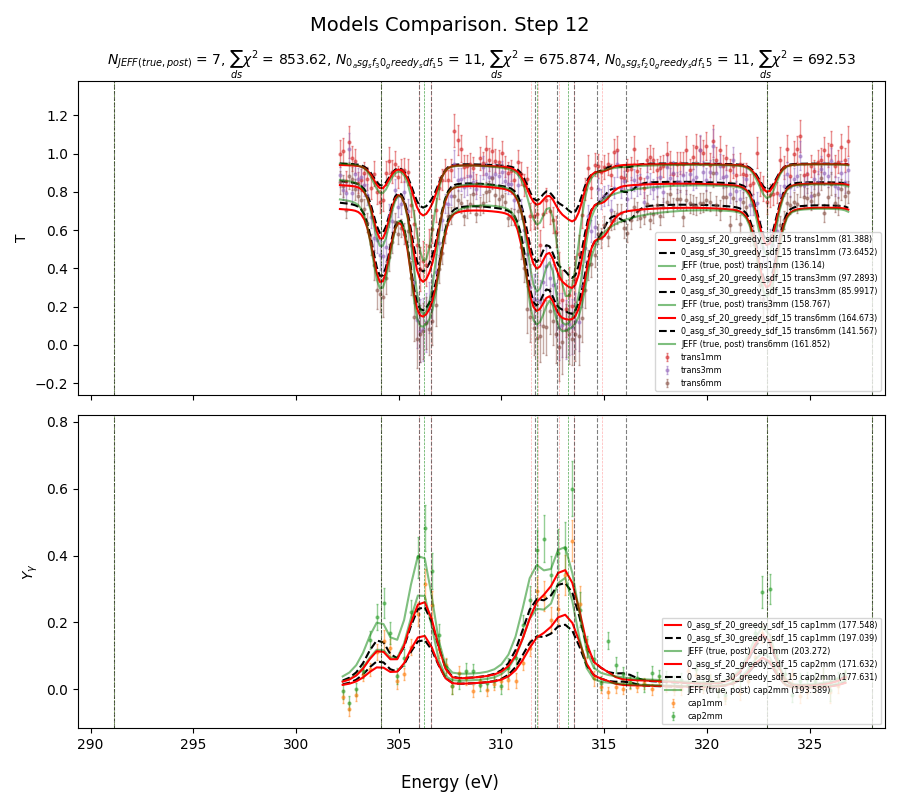

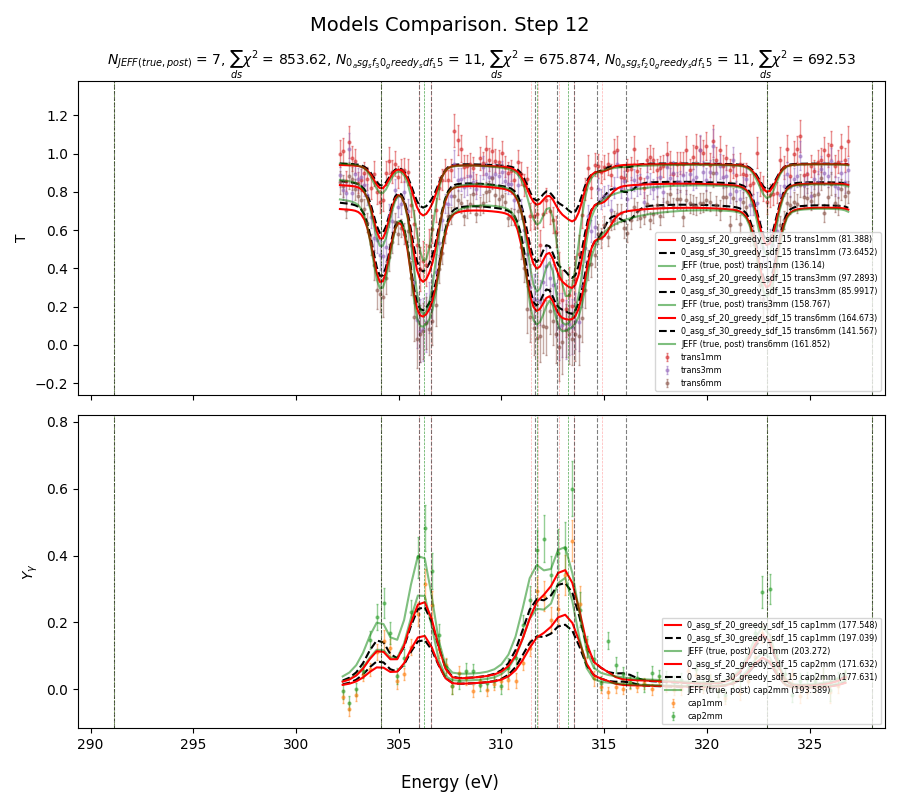

In [14]:

model1 = allexp_data[f'{model1_key}']['hist'].elimination_history[comp_level]['selected_ladder_chars']
model2 = allexp_data[f'{model2_key}']['hist'].elimination_history[comp_level]['selected_ladder_chars']

fig = elim_addit_funcs.plot_datafits(datasets, experiments, 
    fits=model1.pw_post, fits_chi2=model1.chi2_post, f_model_name=f'{model1_key}', f_color='red',
    priors=model2.pw_post, priors_chi2=model2.chi2_post, pr_model_name=f'{model2_key}', pr_color='black',

    true=true_chars.pw_post, true_chi2 = true_chars.chi2_post, t_model_name ='JEFF (true, post)', t_color='green',
        true_pars = true_chars.par_post,
        fit_pars = model1.par_post, 
        prior_pars = model2.par_post,

    title = f'Models Comparison. Step {comp_level}',
    show_spingroups = False,
    fig_size = fig_size_data
    )

fig.show()

In [ ]:
# cycle of images creation

out_images = []

for step in allexp_data[f'{model1_key}']['hist'].elimination_history:
    print(step)

    model1 = allexp_data[f'{model1_key}']['hist'].elimination_history[step]['selected_ladder_chars']
    model2 = allexp_data[f'{model2_key}']['hist'].elimination_history[step]['selected_ladder_chars']

    # paths to save figures
    model_comp_path = anim_save_dir + f'model_comp_{model1_key}_{model2_key}_step_{step}.png'
    chi2_hist_path = anim_save_dir + f'chi2_hist_{model1_key}_{model2_key}_step_{step}.png'
    combined_image_path = anim_save_dir + f'combined_{model1_key}_{model2_key}_step_{step}.png'

    fig = elim_addit_funcs.plot_datafits(datasets, experiments, 
        fits=model1.pw_post, fits_chi2=model1.chi2_post, f_model_name=f'{model1_key}', f_color='red',
        priors=model2.pw_post, priors_chi2=model2.chi2_post, pr_model_name=f'{model2_key}', pr_color='black',

        true=true_chars.pw_post, true_chi2 = true_chars.chi2_post, t_model_name ='JEFF (true, post)', t_color='green',
            true_pars = true_chars.par_post,
            fit_pars = model1.par_post, 
            prior_pars = model2.par_post,

        title = f'Models Comparison. Step {step}',
        show_spingroups = False,
        fig_size = fig_size_data
        )
    
    fig.savefig(fname = model_comp_path)

    # get the plots of history for this step
    fig_hist = elim_addit_funcs.plot_history(allexp_data = allexp_data,
                            show_keys = compare_keys,
                            settings=settings,
                            fig_size = fig_size_hist,
                            max_level = step,
                            title='Steps tracking',
                            folder_to_save=anim_save_dir)
    
    fig_hist.savefig(fname = chi2_hist_path)

    # combine both images into one left+right (left - model_comp_step, right - chi2_hist_step_)
    image1 = Image.open(model_comp_path)
    image2 = Image.open(chi2_hist_path)

    # Determine the total width and max height of the combined image
    total_width = image1.width + image2.width
    max_height = max(image1.height, image2.height)

    # Create a new blank image with the correct size
    combined_image = Image.new('RGB', (total_width, max_height))

    # Paste the two images into the combined image
    combined_image.paste(image1, (0, 0))
    combined_image.paste(image2, (image1.width, 0))

    # Save the combined image
    combined_image.save(combined_image_path)
    out_images.append(combined_image_path)
    print(f'saved {combined_image_path}')

    # delete intermediate images
    # del model_comp_path and chi2_hist_path
    os.remove(model_comp_path)
    os.remove(chi2_hist_path)

In [ ]:
def create_animation(pattern: str,  
                     output_name: str,
                     anim_save_dir: str,
                     out_images: list = [],
                     additional_start_images: list =[], 
                     additional_end_images: list =[], 
                     start_duration: int = 3,
                     intermediate_duration: int = 2,
                     end_duration: int = 2):
    
    """Create an animation based on the specified parameters."""
    print('pattern', pattern)

    # If we don't have any data on out_images, parse the directory
    if len(out_images) == 0:
        path_to_search = os.path.join(anim_save_dir, pattern)

        matched_files = glob.glob(path_to_search)

        #matched_files.sort(key=lambda f: int(os.path.basename(f).split('_')[2]), reverse=True)
        matched_files.sort(key=lambda f: int(os.path.basename(f).split('step_')[-1].split('.png')[0]), reverse=True)

        out_images = matched_files
    
    # Convert durations to milliseconds
    start_duration_ms = start_duration * 1000
    intermediate_duration_ms = intermediate_duration * 1000
    end_duration_ms = end_duration * 1000
    
    # Combine all images in the required order
    all_images = additional_start_images + out_images + additional_end_images
    
    # Print image sizes for verification (optional)
    for img_path in all_images:
        with Image.open(img_path) as img:
            print(f"{os.path.basename(img_path)} - Size: {img.size}")
    
    # Create a list of images from the combined file list
    images = [Image.open(f) for f in all_images]
    
    # Output path for the animated GIF
    output_path = os.path.join(anim_save_dir, output_name)
    
    # Create a list of durations corresponding to each image
    durations = ([start_duration_ms] * len(additional_start_images) + 
                 [intermediate_duration_ms] * len(out_images) + 
                 [end_duration_ms] * len(additional_end_images))
    
    # Save the animated GIF using imageio
    imageio.mimsave(output_path, images, duration=durations) 
    
    print(f"Animated GIF saved to {output_path}")
    return output_path  # Return the output path for further use if needed

#######
#######
#######
# combined plots

pattern = f'combined_{model1_key}_{model2_key}_step_*.png'
output_name = f'output_gif_{compare_keys[0]}_{compare_keys[1]}.gif'

# Attempt to use out_images if already defined

out_images = []  # or some default value or handling

anim_path_name = create_animation(pattern = pattern,  
                     output_name = output_name,
                     anim_save_dir = anim_save_dir,
                     out_images = out_images,
                     additional_start_images =[], 
                     additional_end_images =[], 
                     start_duration = 3,
                     intermediate_duration = 2,
                     end_duration = 2)

# xs for the first model
pattern = f'xs_{model1_key}_step_*.png'
output_name = f'output_xs_{compare_keys[0]}.gif'

out_images = []  # or some default value or handling

anim_path_name = create_animation(pattern = pattern,  
                     output_name = output_name,
                     anim_save_dir = anim_save_dir,
                     out_images = out_images,
                     additional_start_images =[], 
                     additional_end_images =[], 
                     start_duration = 3,
                     intermediate_duration = 2,
                     end_duration = 2)

pattern = f'xs_{compare_keys[1]}_step_*.png'
output_name = f'output_xs_{compare_keys[1]}.gif'
out_images = []  # or some default value or handling

anim_path_name = create_animation(pattern = pattern,  
                     output_name = output_name,
                     anim_save_dir = anim_save_dir,
                     out_images = out_images,
                     additional_start_images =[], 
                     additional_end_images =[], 
                     start_duration = 3,
                     intermediate_duration = 2,
                     end_duration = 2)


In [ ]:
# out_images